In [673]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [674]:
#read data
data=pd.read_csv('Train.csv')
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [675]:
definitions=pd.read_csv('VariableDefinitions.csv')
definitions.set_index('Variable Definitions',inplace=True)

In [676]:
definitions.columns

Index(['Unnamed: 1'], dtype='object')

In [677]:
definitions.loc['relationship_with_head','Unnamed: 1']

'The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know'

In [678]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [679]:
data['uniqueid(country)']=data['uniqueid'] + 'x' +data['country']

In [680]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'uniqueid(country)'],
      dtype='object')

In [681]:
data['age_of_respondent'].isna().sum()

0

In [682]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
 13  uniqueid(country)       23524 non-null  object
dtypes: int64(3), object(11)
memory usage: 2.5+ MB


In [683]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [684]:
data["age_cat"] = pd.cut(data["age_of_respondent"],
 bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf],
 labels=[1, 2, 3, 4, 5, 6, 7, 8, 9,10],right=False)


<Axes: >

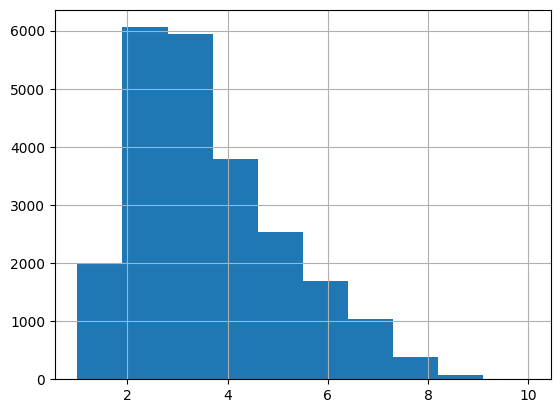

In [685]:
data['age_cat'].hist()

c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


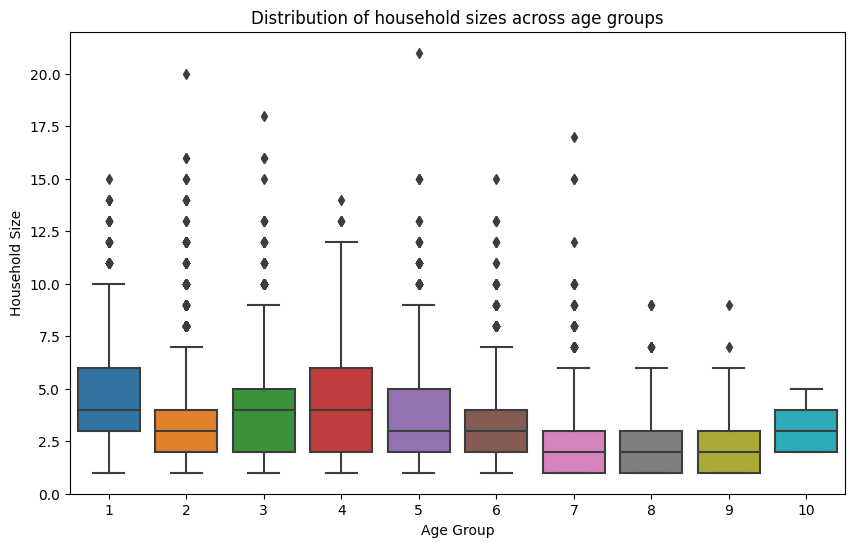

In [686]:
#Visualize distribution with boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='age_cat', y='household_size',data=data)
plt.title('Distribution of household sizes across age groups')
plt.xlabel('Age Group')
plt.ylabel('Household Size')
plt.show()

In [687]:
data.groupby('age_cat')['household_size'].describe()

C:\Users\hp\AppData\Local\Temp\ipykernel_1816\13559289.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('age_cat')['household_size'].describe()


,count,mean,std,min,25%,50%,75%,max
age_cat,,,,,,,,
1,1994.0,4.788867,2.413804,1.0,3.0,4.0,6.0,15.0
2,6057.0,3.490672,2.035668,1.0,2.0,3.0,4.0,20.0
3,5945.0,4.018839,2.153899,1.0,2.0,4.0,5.0,18.0
4,3785.0,4.202642,2.369622,1.0,2.0,4.0,6.0,14.0
5,2541.0,3.737898,2.302125,1.0,2.0,3.0,5.0,21.0
6,1698.0,3.123086,1.983027,1.0,2.0,3.0,4.0,15.0
7,1041.0,2.757925,1.920286,1.0,1.0,2.0,3.0,17.0
8,378.0,2.539683,1.553557,1.0,1.0,2.0,3.0,9.0
9,80.0,2.412500,1.620234,1.0,1.0,2.0,3.0,9.0


In [688]:
data['average_per_group'] = data.groupby('age_cat', observed=False)['household_size'].transform('mean')


In [689]:
data[['average_per_group','age_cat','household_size']]

,average_per_group,age_cat,household_size
0,3.490672,2,3
1,2.757925,7,5
2,3.490672,2,5
3,4.018839,3,5
4,3.490672,2,8
...,...,...,...
23519,4.202642,4,4
23520,3.490672,2,2
23521,3.490672,2,5
23522,4.018839,3,7


In [690]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'uniqueid(country)', 'age_cat',
       'average_per_group'],
      dtype='object')

In [691]:
data['location_type'].value_counts()

location_type
Rural    14343
Urban     9181
Name: count, dtype: int64

In [692]:
data['cellphone_access'].value_counts()

cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64

In [693]:
data['gender_of_respondent'].value_counts()

gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64

In [694]:
definitions.loc['relationship_with_head','Unnamed: 1']

'The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know'

In [695]:
rlship={'Spouse':'Not Head of household', 'Child':'Not Head of household', 'Parent':'Not Head of household', 'Other relative':'Not Head of household', 'Other non-relatives':'Not Head of household', 'Dont know':'Not Head of household'}
data['relationship_with_head'].replace(rlship,inplace=True)

In [696]:
data['relationship_with_head'].value_counts()

relationship_with_head
Head of Household        12831
Not Head of household    10693
Name: count, dtype: int64

In [697]:
data['marital_status'].value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

In [698]:
data['marital_status'].value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

In [699]:
marital={"Single/Never Married":"Not_Married",'Widowed':'Not_Married',"Divorced/Seperated":"Not_Married","Dont know":"Not_Married","Married/Living together":"Married"}
data['marital_status'].replace(marital,inplace=True)

In [700]:
data['marital_status'].value_counts()

marital_status
Not_Married    12775
Married        10749
Name: count, dtype: int64

In [701]:
data['education_level'].value_counts()

education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64

In [702]:
ed_map={'Tertiary education':'Higher education','Vocational/Specialised training':'Higher education'}
data['education_level'].replace(ed_map,inplace=True)

In [703]:
data['education_level'].value_counts()

education_level
Primary education      12791
No formal education     4515
Secondary education     4223
Higher education        1960
Other/Dont know/RTA       35
Name: count, dtype: int64

In [704]:
data['job_type'].value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

In [705]:
emp={'Formally employed Private': 'Formally employed','Formally employed Government': 'Formally employed','Farming and Fishing': 'Unskilled Labor','Government Dependent': 'Dependency','Remittance Dependent': 'Dependency'}
data['job_type'].replace(emp,inplace=True)

In [706]:
data['job_type'].value_counts()

job_type
Self employed                 6437
Informally employed           5597
Unskilled Labor               5441
Dependency                    2774
Formally employed             1442
Other Income                  1080
No Income                      627
Dont Know/Refuse to answer     126
Name: count, dtype: int64

In [707]:
# Assuming your original column is named 'employment_status'
data['employment_group'] = data['job_type'].replace({
    'Self employed': 'Employed',
    'Formally employed': 'Employed',
    'Unskilled Labor': 'Informal Labor',
    'Informally employed': 'Informal Labor',
    'Other Income': 'Informal Labor',
    "Don't Know/Refuse to answer": 'Unknown'
})

data['dependent_flag'] = (data['job_type'] == 'Dependency').astype(int)
data['no_income_flag'] = (data['job_type'] == 'No Income').astype(int)

In [708]:
data.set_index('uniqueid(country)',inplace=True)

In [709]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'age_cat', 'average_per_group',
       'employment_group', 'dependent_flag', 'no_income_flag'],
      dtype='object')

In [710]:
data.drop(columns=['year','uniqueid','job_type','age_cat','household_size', 'age_of_respondent'],inplace=True)

In [711]:
#Target Variable
data['bank_account']=data['bank_account'].replace({'Yes':1,'No':0})

In [712]:
X=data.drop('bank_account', axis=1)
y=data['bank_account']

In [713]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [714]:

# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

In [715]:
# Create transformers for each type of column
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [716]:
# Create a column transformer to apply transformers to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [717]:
# Create the final pipeline by appending the logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the pipeline on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

In [718]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Display the accuracy
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.883863288556368
